In [ ]:
# MNIST CNN Training with PyTorch on Apple M4
# Optimized for Apple Silicon MPS backend

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
# Confusion matrix visualization
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import torch.nn.functional as F
import matplotlib.pyplot as plt
import sklearn
import numpy as np
from tqdm import tqdm
import time
import importlib

from ml_modules import data
importlib.reload(data)

from ml_modules import models
importlib.reload(models)

from ml_modules import visualize
importlib.reload(visualize)

from ml_modules import train
importlib.reload(train)

# Check for Apple Silicon MPS availability
print(f"PyTorch version: {torch.__version__}")
print(f"MPS available: {torch.backends.mps.is_available()}")
print(f"MPS built: {torch.backends.mps.is_built()}")

# Set device - prioritize MPS for Apple Silicon
if torch.backends.mps.is_available():
    device = torch.device("mps")
    print("Using Apple Silicon MPS")
elif torch.cuda.is_available():
    device = torch.device("cuda")
    print("Using CUDA")
else:
    device = torch.device("cpu")
    print("Using CPU")

PyTorch version: 2.7.1
MPS available: True
MPS built: True
Using Apple Silicon MPS


In [2]:
mnist_train_loader, mnist_test_loader, cifar_data_info = data.get_mnist_loaders()
i = iter(mnist_test_loader)

In [3]:
importlib.reload(models)
model = models.ToyCNN().to(device)

In [4]:
data, target = next(i)
data_mps, target_mps = data.to(device, non_blocking=True), target.to(device, non_blocking=True)

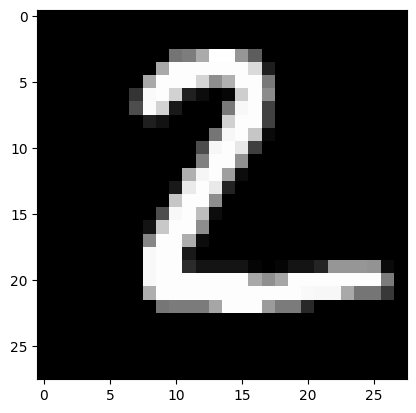

In [9]:
plt.imshow(data[1].squeeze(),cmap="gray")

[Parameter containing:
tensor([[[[-0.1647,  0.2378, -0.2217],
          [-0.0346, -0.0791, -0.1895],
          [ 0.1537, -0.0279,  0.2659]]]], device='mps:0', requires_grad=True), Parameter containing:
tensor([-0.0708], device='mps:0', requires_grad=True)]
[Parameter containing:
tensor([[[[ 0.0144,  0.0703, -0.0742],
          [-0.0356, -0.0031,  0.0102],
          [ 0.0466,  0.0656,  0.0299]]]], device='mps:0', requires_grad=True), Parameter containing:
tensor([0.0575], device='mps:0', requires_grad=True)]
[Parameter containing:
tensor([[[[ 0.0284,  0.0386, -0.0545],
          [-0.0439,  0.0152, -0.0003],
          [ 0.0582,  0.0513,  0.0336]]]], device='mps:0', requires_grad=True), Parameter containing:
tensor([0.0573], device='mps:0', requires_grad=True)]
[Parameter containing:
tensor([[[[ 0.0291,  0.0368, -0.0531],
          [-0.0441,  0.0170, -0.0020],
          [ 0.0583,  0.0505,  0.0343]]]], device='mps:0', requires_grad=True), Parameter containing:
tensor([0.0573], device='mps:

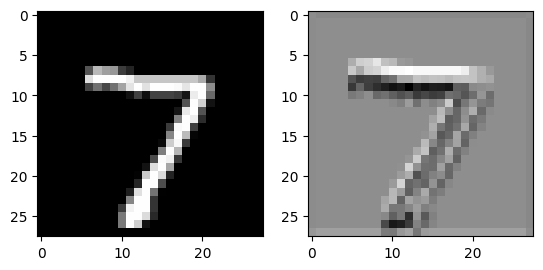

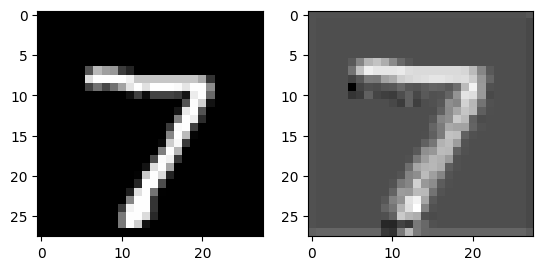

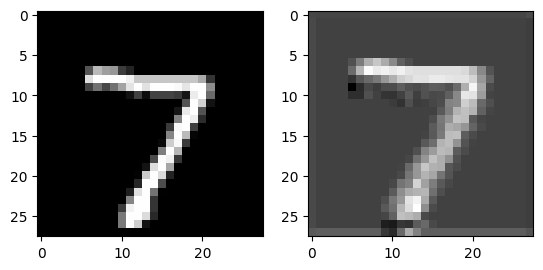

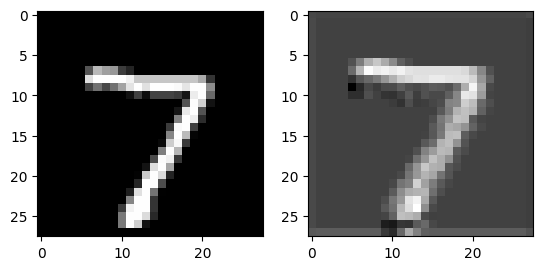

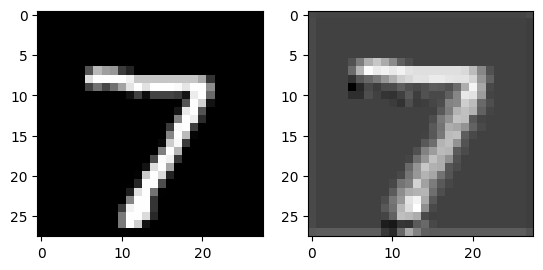

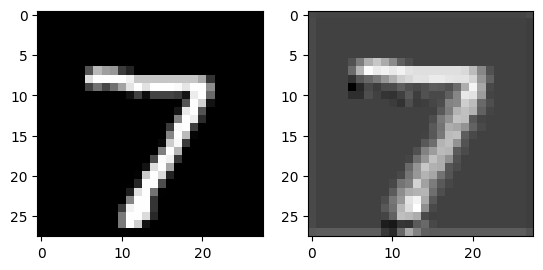

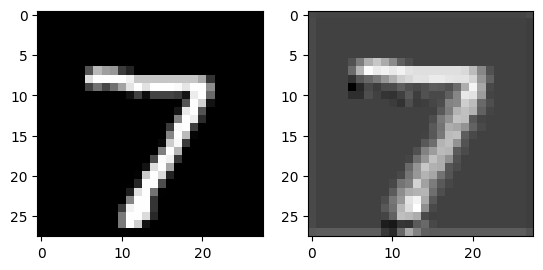

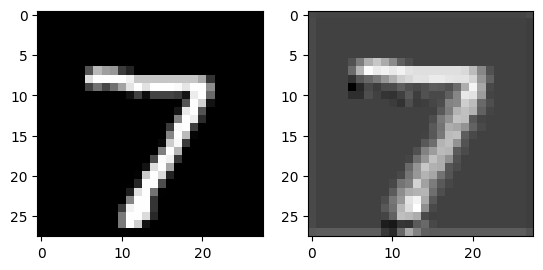

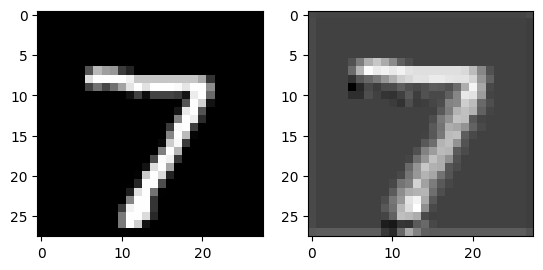

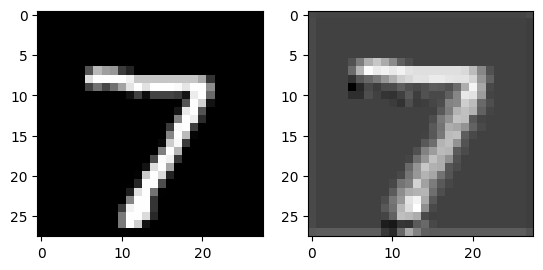

In [ ]:
model = models.ToyCNN().to(device)
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)

# Learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=3)

losses = []

for i in range(10000):

    optimizer.zero_grad()
    
    out = model(data_mps[0])
    target = data_mps[1]

    loss =  ((out - target) * (out - target)).sum()

    losses.append(loss)

    loss.backward()

    optimizer.step()


    out_cpu = out.to('cpu')

    if i % 1000 == 0:
        fig, axs = plt.subplots(1,2)
        axs[0].imshow(data[0].squeeze(), cmap='gray')
        axs[1].imshow(out_cpu.detach().numpy().squeeze(), cmap='gray')
        print([x for x in model.parameters()])